In [1]:
!module purge
!module load apps/anaconda3
!module load compilers/nvidia/cuda/11.2
!module load compilers/gcc/8.3.0

In [2]:

import cv2
import os
import random

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
import tensorflow as tf
import tensorflow.keras as keras


In [5]:
tf.__version__

'2.7.0'

In [6]:
tf.random.set_seed(42)
np.random.seed(42)


In [7]:
train_dir = "/home/191112024/splited_dataset/AGCCPF/train"
test_dir = "/home/191112024/splited_dataset/AGCCPF/test"
valid_dir = "/home/191112024/splited_dataset/AGCCPF/validate"


In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        )

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=20,
        )

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        )

Found 5253 images belonging to 3 classes.
Found 1315 images belonging to 3 classes.
Found 1644 images belonging to 3 classes.


In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [12]:
from tensorflow.keras import optimizers

In [13]:
from tensorflow.keras.applications import DenseNet121
# conv_base = VGG16(weights='imagenet',
#                   include_top=False,
#                   input_shape=(200, 200, 3))


# conv_base = EfficientNetB7(weights='imagenet',
#                   include_top=False,
#                   input_shape=(150, 150, 3))

conv_base = DenseNet121(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

# conv_base = MobileNet(weights='imagenet',
#                   include_top=False,
#                   input_shape=(150, 150, 3))

In [14]:
conv_base.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [15]:
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(3, activation='softmax'))



In [16]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(150, 150, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

/home/191112024/.local/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "model_dencenet.h5", save_best_only=True)
earlystop_cb = keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True)


In [18]:
model.summary(0)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 3)                 3075      
                                                                 
Total params: 7,040,579
Trainable params: 6,956,931
Non-trainable params: 83,648
_________________________________________________________________


In [19]:
history = model.fit(train_generator,
                    steps_per_epoch=250,
                    epochs=200,
                    validation_data=valid_generator,
                    validation_steps=60,
                    callbacks=[checkpoint_cb])


Epoch 1/200
250/250 [==============================] - 668s 3s/step - loss: 1.1564 - acc: 0.4206 - recall: 0.2558 - precision: 0.4351 - val_loss: 1.0663 - val_acc: 0.4467 - val_recall: 0.2942 - val_precision: 0.4596
Epoch 2/200
250/250 [==============================] - 650s 3s/step - loss: 0.9415 - acc: 0.5396 - recall: 0.4128 - precision: 0.5749 - val_loss: 0.9312 - val_acc: 0.5608 - val_recall: 0.4492 - val_precision: 0.5904
Epoch 3/200
250/250 [==============================] - 649s 3s/step - loss: 0.8873 - acc: 0.5726 - recall: 0.4673 - precision: 0.6107 - val_loss: 0.9069 - val_acc: 0.5733 - val_recall: 0.4933 - val_precision: 0.6066
Epoch 4/200
250/250 [==============================] - 648s 3s/step - loss: 0.8609 - acc: 0.6006 - recall: 0.5035 - precision: 0.6468 - val_loss: 0.9021 - val_acc: 0.5642 - val_recall: 0.5008 - val_precision: 0.5962
Epoch 5/200
250/250 [==============================] - 651s 3s/step - loss: 0.8098 - acc: 0.6189 - recall: 0.5343 - precision: 0.6567 - 

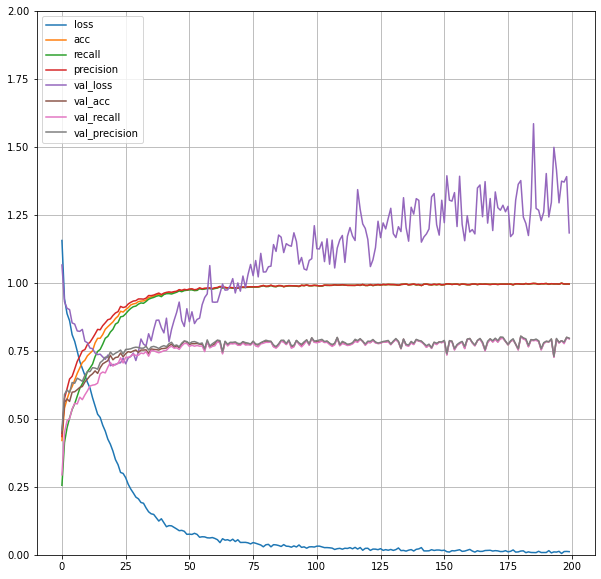

In [20]:
pd.DataFrame(history.history).plot(figsize=(10, 10))
plt.ylim((0,2))
plt.grid(True)
plt.show()

In [21]:
model.evaluate(test_generator)

83/83 [==============================] - 27s 322ms/step - loss: 1.3130 - acc: 0.7908 - recall: 0.7883 - precision: 0.7922


[1.3130171298980713,
 0.7907542586326599,
 0.7883211970329285,
 0.7921760678291321]

In [22]:
x=model.predict(train_generator)
actual=train_generator.labels
pred=np.argmax(x, axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[ 150,  499,  272],
       [ 510, 1440,  830],
       [ 261,  841,  450]])

In [23]:
x=model.predict(valid_generator)
actual=valid_generator.labels
pred=np.argmax(x, axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[ 34, 112,  85],
       [110, 374, 212],
       [ 65, 214, 109]])

In [24]:
x=model.predict(test_generator)
actual=test_generator.labels
pred=np.argmax(x, axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[ 50, 148,  90],
       [143, 499, 228],
       [ 86, 251, 149]])